In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,precision_score, recall_score,accuracy_score

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI Lab/data4.csv")
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
0,90.0,77053.0,9.0,0,4356.0,40.0,<=50K
1,82.0,132870.0,9.0,0,4356.0,18.0,<=50K
2,66.0,186061.0,10.0,0,4356.0,40.0,<=50K
3,54.0,140359.0,4.0,0,3900.0,40.0,<=50K
4,NaN,264663.0,10.0,0,3900.0,40.0,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             97 non-null     float64
 1   fnlwgt          98 non-null     float64
 2   education.num   97 non-null     float64
 3   capital.gain    100 non-null    int64  
 4   capital.loss    97 non-null     float64
 5   hours.per.week  94 non-null     float64
 6   income          100 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
df.shape

(100, 7)

In [ ]:
df.isnull().any()

age                True
fnlwgt             True
education.num      True
capital.gain      False
capital.loss       True
hours.per.week     True
income            False
dtype: bool

In [ ]:
df['age']=df['age'].fillna(df['age'].mean())
df['fnlwgt']=df['fnlwgt'].fillna(df['fnlwgt'].mean())
df['education.num']=df['education.num'].fillna(df['education.num'].mean())
df['capital.loss']=df['capital.loss'].fillna(df['capital.loss'].mean())
df['hours.per.week']=df['hours.per.week'].fillna(df['hours.per.week'].mean())

In [ ]:
df.isnull().any()

age               False
fnlwgt            False
education.num     False
capital.gain      False
capital.loss      False
hours.per.week    False
income            False
dtype: bool

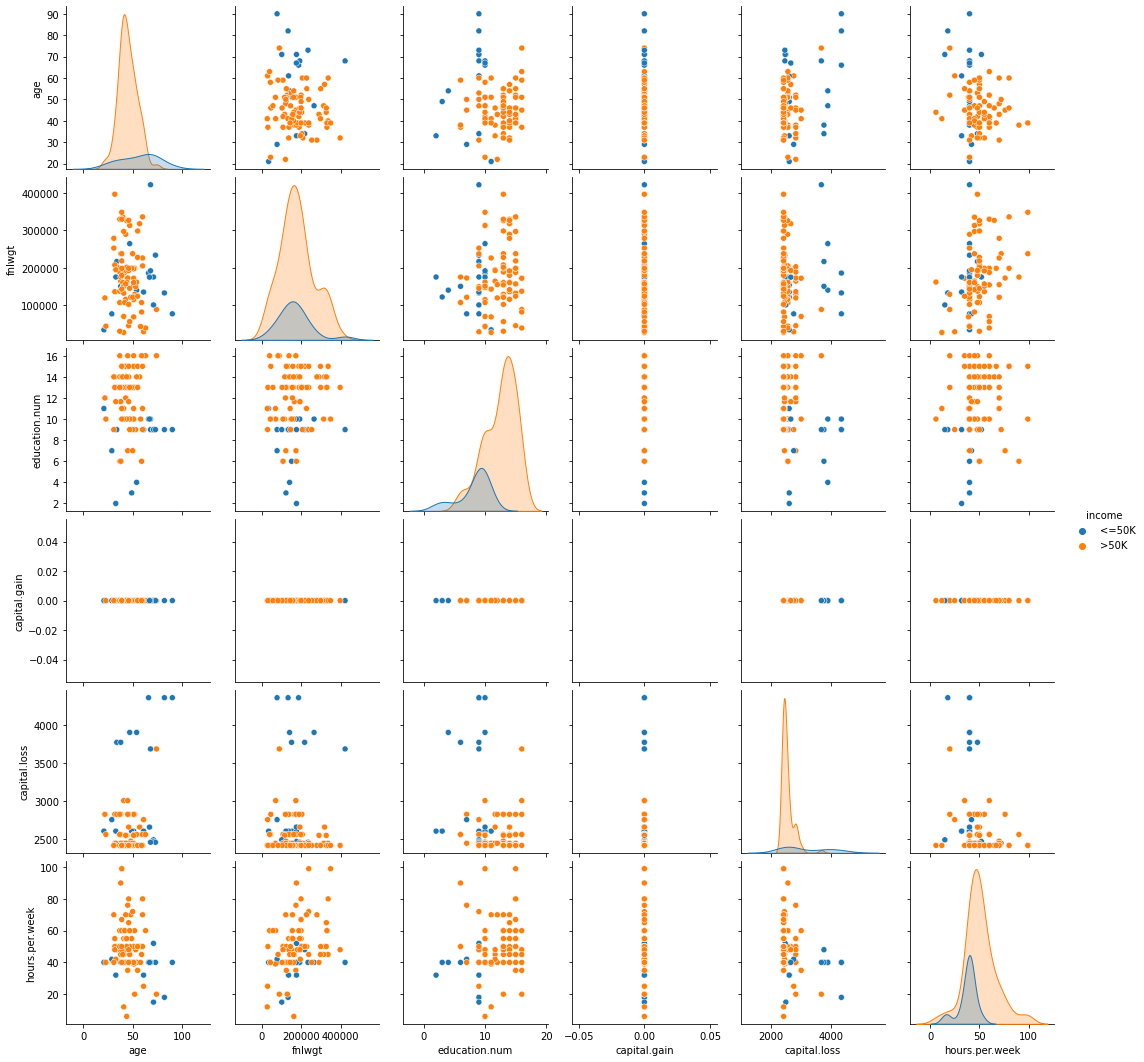

In [ ]:
sns.pairplot(data=df, hue = 'income')

In [ ]:
cols=['age','fnlwgt','education.num']
for i in range(0,len(cols)-2):
  cor=np.corrcoef(df[cols[i]],df[cols[i+1]])
  if(cor.any()>0.25 or cor.any()<-0.25):
    print("correlation between",cols[i],"and ",cols[i+1]," is ",cor)

correlation between age and  fnlwgt  is  [[ 1.         -0.06222694]
 [-0.06222694  1.        ]]


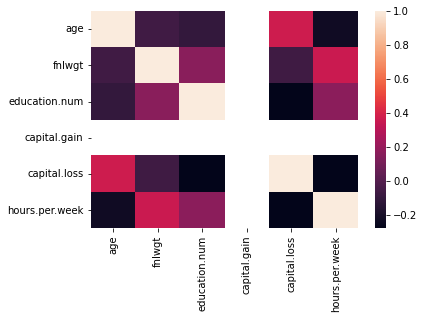

In [ ]:
sns.heatmap(df.corr())

In [ ]:
target=df['income']
df1 = df.copy()
df1 = df1.drop('income', axis=1) #Feature colums

In [ ]:
target

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
      ...  
95     >50K
96     >50K
97     >50K
98     >50K
99     >50K
Name: income, Length: 100, dtype: object

In [ ]:
#Label Encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
x = df1 #Feature columns
y = target #Target column

In [ ]:
#Splitting the data - 80-20 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
print("Training split input - ", x_train.shape)
print("Testing split input - ",x_test.shape)

Training split input -  (80, 6)
Testing split input -  (20, 6)


In [ ]:
# Defining the decision tree algorithm 
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
print("Decision Tree Classifier Created")

Decision Tree Classifier Created


In [ ]:
# Predicting the values of test data
from sklearn.metrics import classification_report
y_pred = dtree.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.94      0.97        17

    accuracy                           0.95        20
   macro avg       0.88      0.97      0.91        20
weighted avg       0.96      0.95      0.95        20



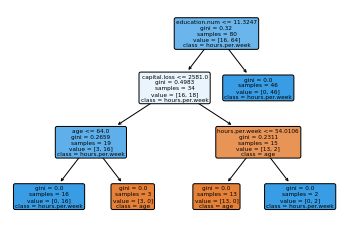

In [ ]:
#Visualizing the decision tree
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["age", "hours.per.week", "capital.loss","education.num"] , filled = True , precision = 4, rounded = True)

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.88      0.94        17

    accuracy                           0.90        20
   macro avg       0.80      0.94      0.84        20
weighted avg       0.94      0.90      0.91        20



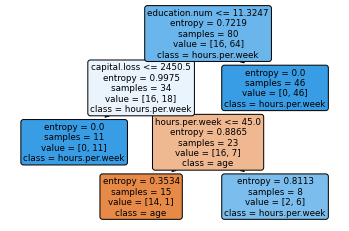

In [ ]:
dec_tree = plot_tree(decision_tree=clf, feature_names = df1.columns, 
                     class_names =["age", "hours.per.week", "capital.loss","education.num"] , filled = True , precision = 4, rounded = True)

In [ ]:
clf1 = tree.DecisionTreeClassifier(criterion='entropy',splitter='random', max_depth=10) #decision tree with diff parameters(2)
clf1 = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.88      0.94        17

    accuracy                           0.90        20
   macro avg       0.80      0.94      0.84        20
weighted avg       0.94      0.90      0.91        20



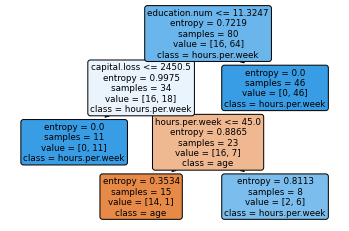

In [ ]:
dec_tree = plot_tree(decision_tree=clf1, feature_names = df1.columns, 
                     class_names =["age", "hours.per.week", "capital.loss","education.num"] , filled = True , precision = 4, rounded = True)

Text(0.5, 1.0, 'Accuracy Score: 0.95')

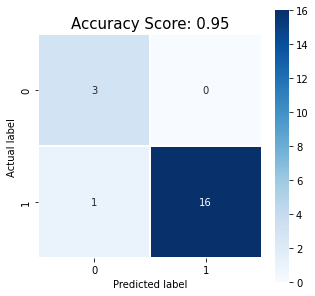

In [ ]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

Q1 25 percentile of the given data is,  40.0
Q1 50 percentile of the given data is,  46.5
Q1 75 percentile of the given data is,  55.0
Interquartile range is 15.0
low_limit is 17.5
up_limit is 77.5
 outlier in the dataset is [90.0, 15.0, 6.0, 12.0, 80.0, 99.0, 80.0, 99.0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


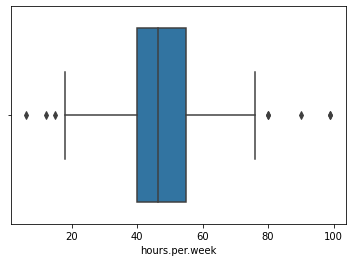

In [ ]:
sort_data = np.sort(df['hours.per.week'])

Q1 = np.percentile(df['hours.per.week'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(df['hours.per.week'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(df['hours.per.week'], 75, interpolation = 'midpoint') 

print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

outlier =[]
for x in df['hours.per.week']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

sns.boxplot(df['hours.per.week'])